# Plots to analyze posterior

In [1]:
import os, sys
os.chdir('/Users/dananjayaliyanage/git/observables/vah_design/emulation')
sys.path.append('/Users/dananjayaliyanage/git/surmise/')

In [2]:
from plotting import *
from priors import xlimits
from priors import prior_VAH

In [3]:
xlimits

array([[ 1.00e+01,  3.00e+01],
       [-7.00e-01,  7.00e-01],
       [ 5.00e-01,  1.50e+00],
       [ 0.00e+00,  1.70e+00],
       [ 3.00e-01,  2.00e+00],
       [ 1.35e-01,  1.65e-01],
       [ 1.30e-01,  3.00e-01],
       [ 1.00e-02,  2.00e-01],
       [-2.00e+00,  1.00e+00],
       [-1.00e+00,  2.00e+00],
       [ 1.00e-02,  2.50e-01],
       [ 1.20e-01,  3.00e-01],
       [ 2.50e-02,  1.50e-01],
       [-8.00e-01,  8.00e-01],
       [ 3.00e-01,  1.00e+00]])

In [5]:
import pickle
import pyximport
pyximport.install(setup_args={"include_dirs":np.get_include()},
                  reload_support=True)
                  
cal_name = 'VAH_' + 'PCSK' + '_calibrator_PTLMC_closure_'
with open(cal_name + '.pkl' , 'rb') as file:
    cal = pickle.load(file)   

closure_values = np.load('closure_params_PCSK.npy')
print(closure_values)

[[13.366  -0.5447  0.8631  0.7807  1.4609  0.149   0.1465  0.1747  0.2695
   0.2981  0.0289  0.1339  0.1489 -0.587   0.9472]]


In [8]:
random_draws_calibration_chain = True
# By setting above to true we will use surmise inbuilt random resampling of the MCMC chain that has been constructed during calibration.
# We also save the final chain as a csv file. Instead of random resampling we can directly load that. This will be redundant if we add
# a function to the calibration.py to return the full chain from the calibration instead of resampling. 
if random_draws_calibration_chain:
    post = cal.theta.rnd(40000)
    post_df = pd.DataFrame(post,columns=model_param_dsgn)
else:
    post = cal.info['thetarnd']
    post_df = pd.DataFrame(post,columns=model_param_dsgn)
prior = prior_VAH.rnd(post_df.shape[0])
prior_df = pd.DataFrame(prior,columns=model_param_dsgn)


In [9]:
print(post_df.shape, prior_df.shape)

(40000, 15) (40000, 15)


In [13]:
# If false, do not try to find the MAP value and load it from a saved file.
find_map_param = True
from scipy import optimize
if find_map_param == True:
    bounds=[(a,b) for (a,b) in zip(xlimits[:,0],xlimits[:,1])]
    x0=[(a+b)/2 for (a,b) in zip(xlimits[:,0],xlimits[:,1])]

    print(bounds)
    #rslt = optimize.differential_evolution(lambda x: -cal.theta.lpdf(theta=np.array(x).reshape(-1,15)).flatten(),
    #                                        bounds=bounds,
    #                                       maxiter=100000,
    #                                        tol=1e-9,
    #                                        disp=True)
    minimizer_kwargs = {"method": "L-BFGS-B", "bounds": bounds,"tol":1e-11}
    rslt=optimize.basinhopping(lambda x: -cal.theta.lpdf(theta=np.array(x).reshape(-1,15)).flatten()
                                ,x0,niter=10,minimizer_kwargs=minimizer_kwargs)
    MAP = rslt.x
    np.save(cal_name, MAP)
else:
    MAP = np.load(cal_name+'.npy')

[(10.0, 30.0), (-0.7, 0.7), (0.5, 1.5), (0.0, 1.7), (0.3, 2.0), (0.135, 0.165), (0.13, 0.3), (0.01, 0.2), (-2.0, 1.0), (-1.0, 2.0), (0.01, 0.25), (0.12, 0.3), (0.025, 0.15), (-0.8, 0.8), (0.3, 1.0)]


In [14]:
nsamples = 40000
prune = 10

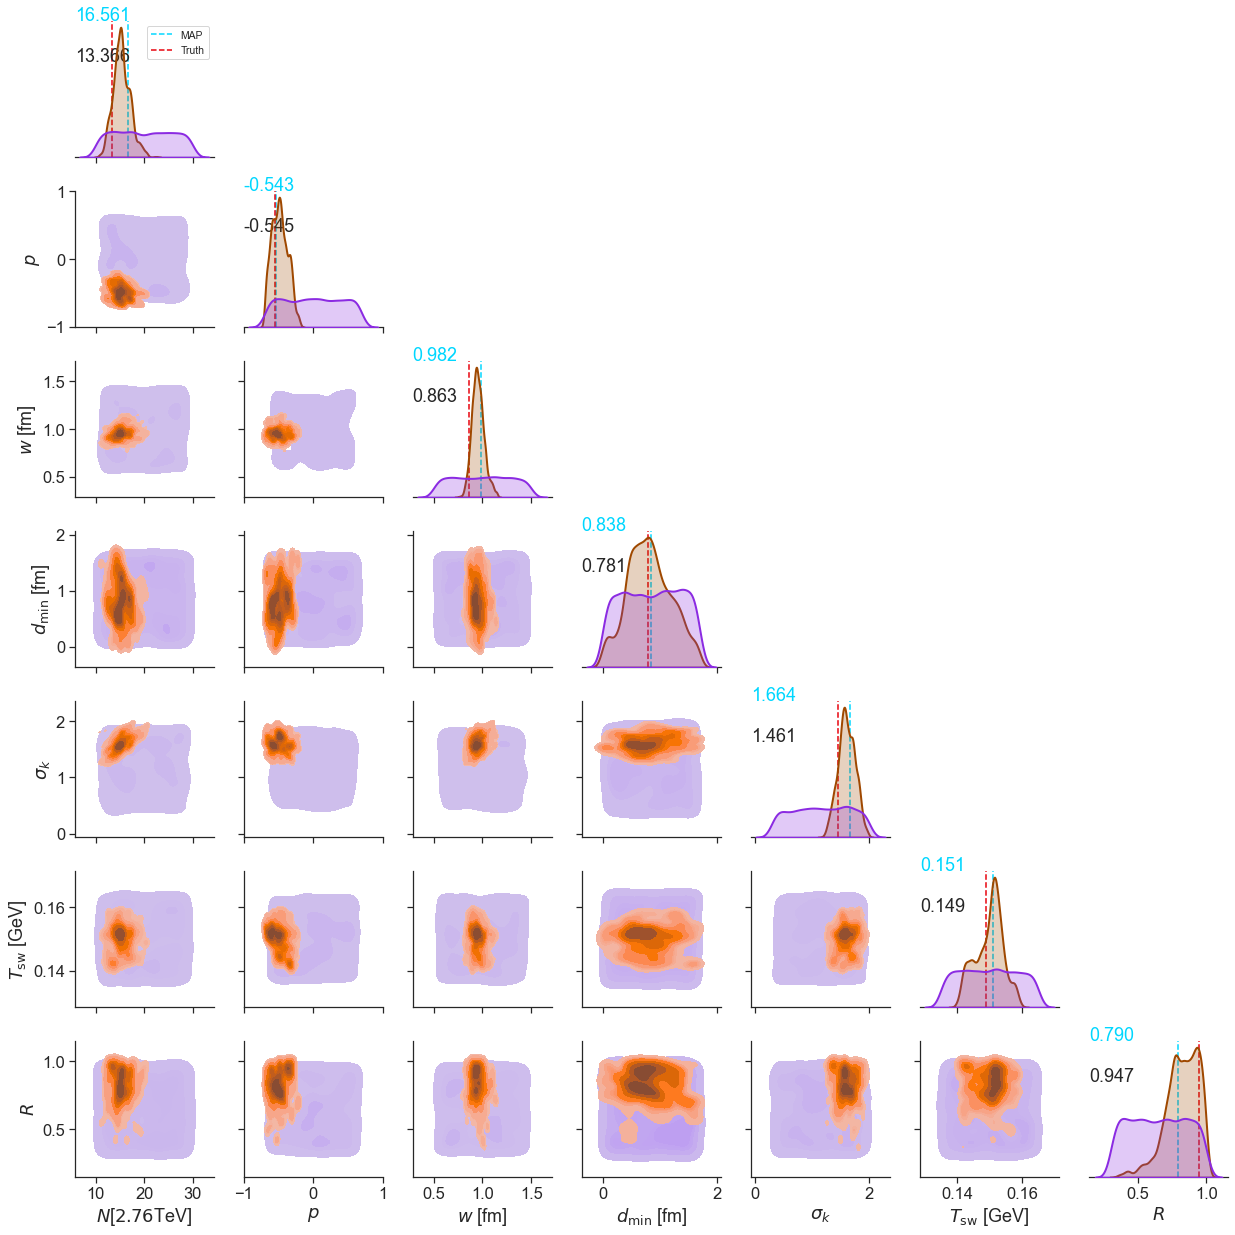

In [15]:
plot_corner_no_viscosity(post_df,prior_df,'PCSK',nsamples,prune, MAP, closure_values)

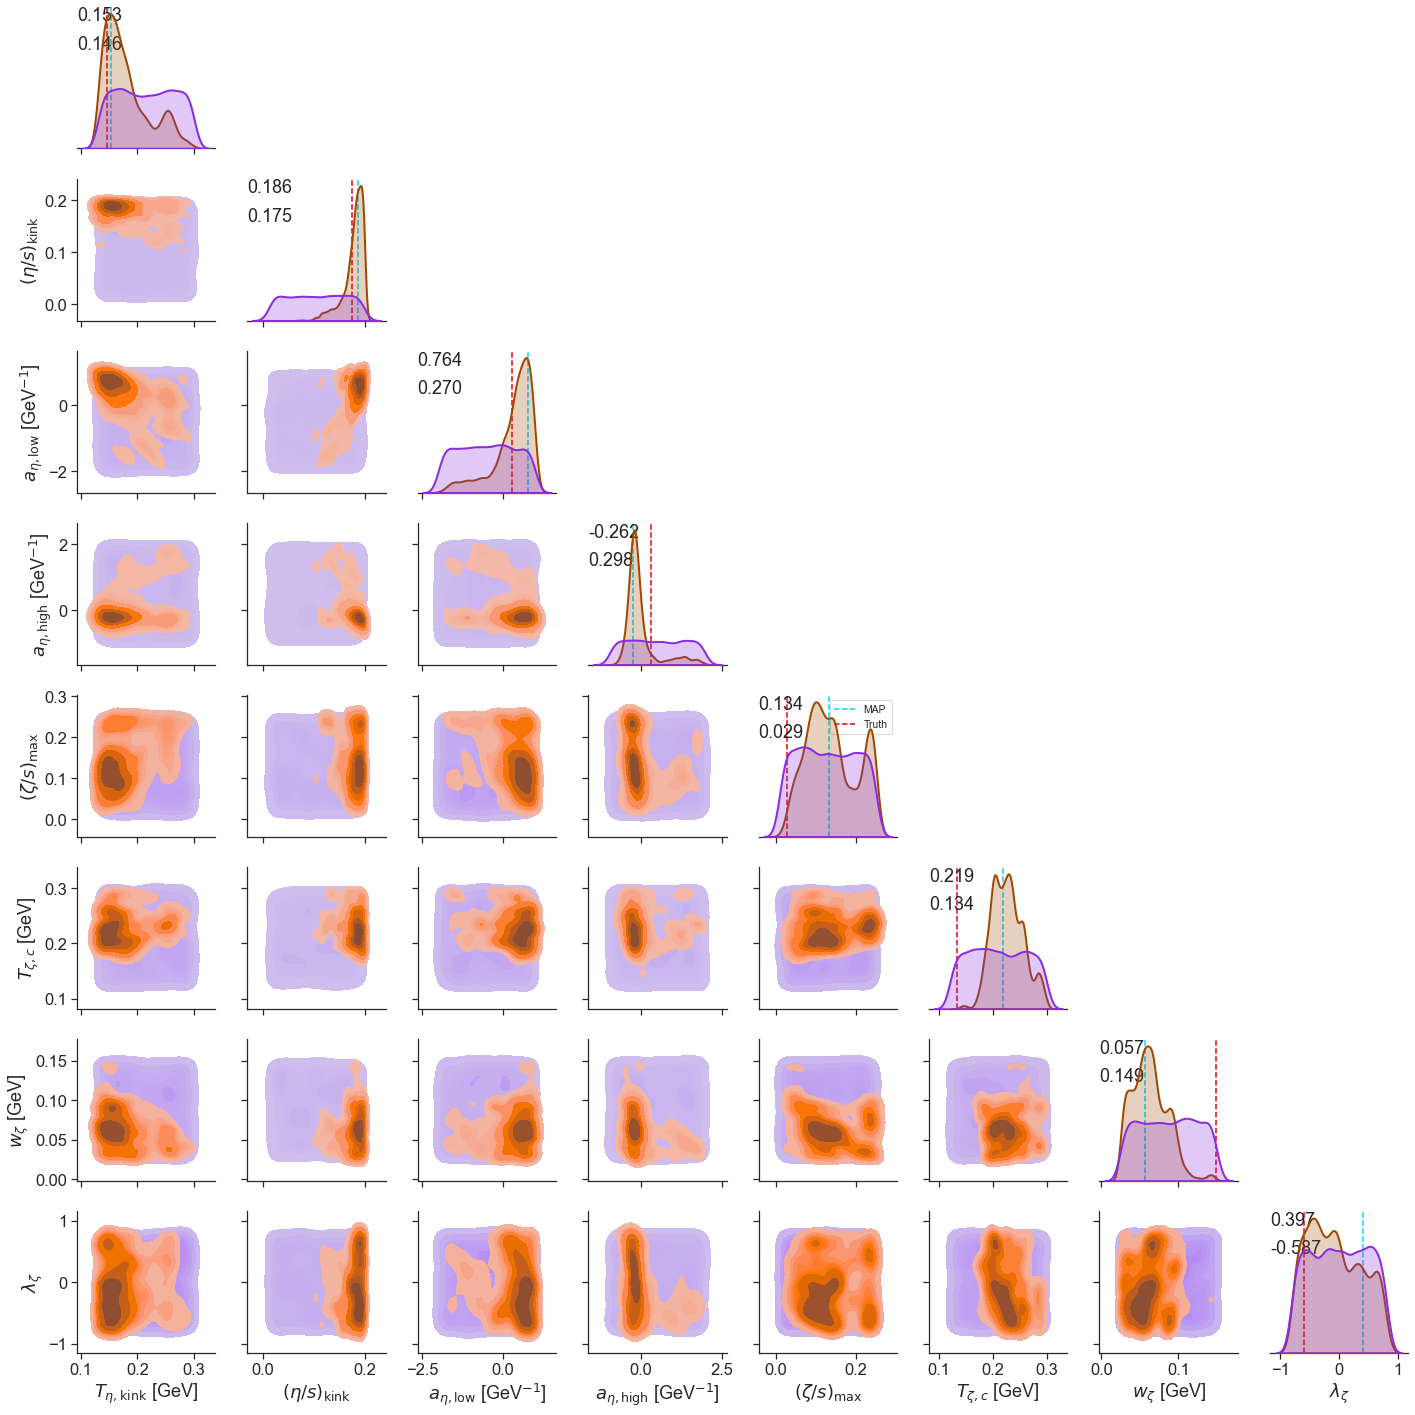

In [16]:
plot_corner_viscosity(post_df,prior_df,'PCSK',nsamples,prune,  MAP, closure_values)

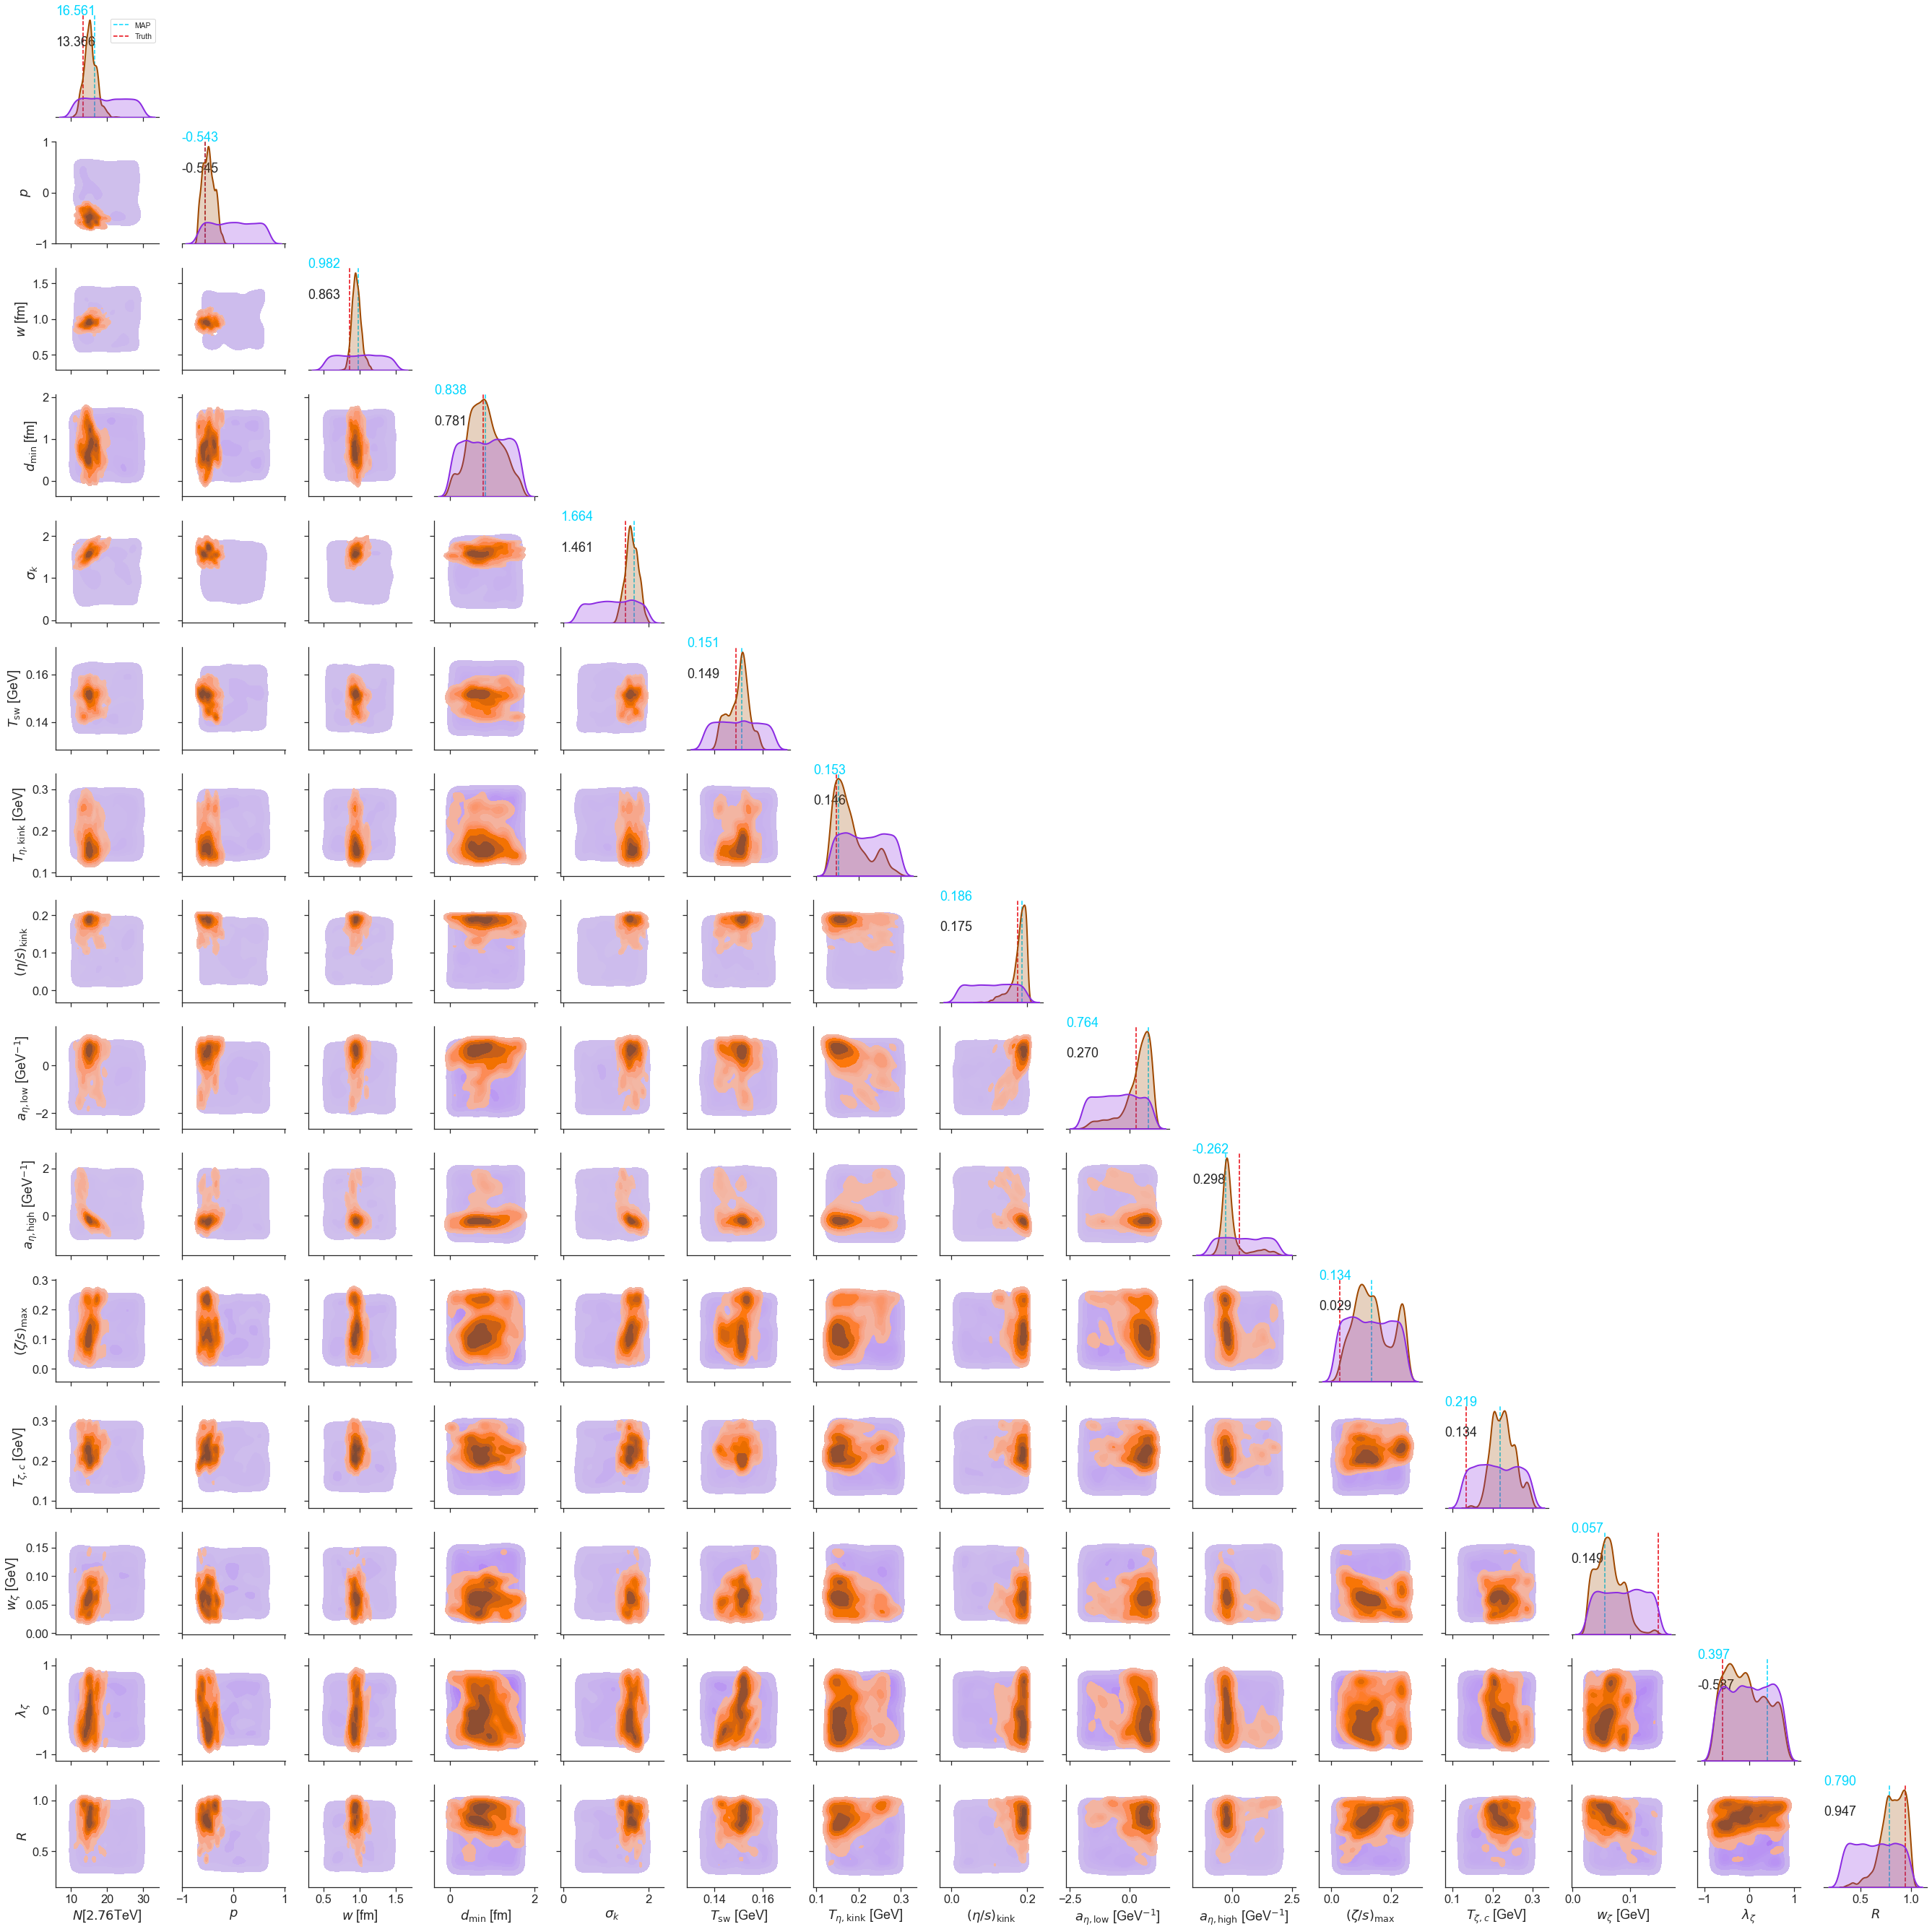

In [17]:
plot_corner_all(post_df,prior_df,'PCSK',nsamples,prune, MAP, closure_values)

[13.366  -0.5447  0.8631  0.7807  1.4609  0.149   0.1465  0.1747  0.2695
  0.2981  0.0289  0.1339  0.1489 -0.587   0.9472]


/Users/dananjayaliyanage/git/observables/vah_design/emulation/plotting.py:401: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


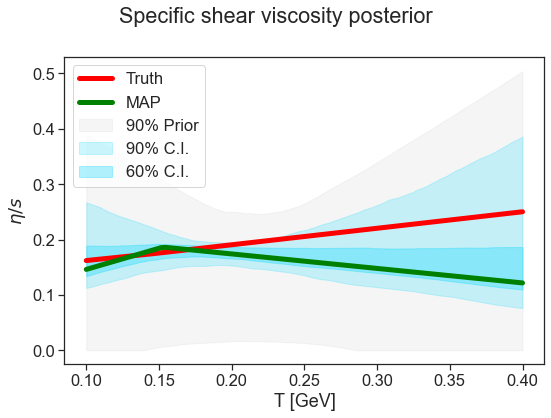

In [18]:
plot_shear(post_df,'PCSK',xlimits, nsamples,prune, MAP, closure_values)

/Users/dananjayaliyanage/git/observables/vah_design/emulation/plotting.py:461: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


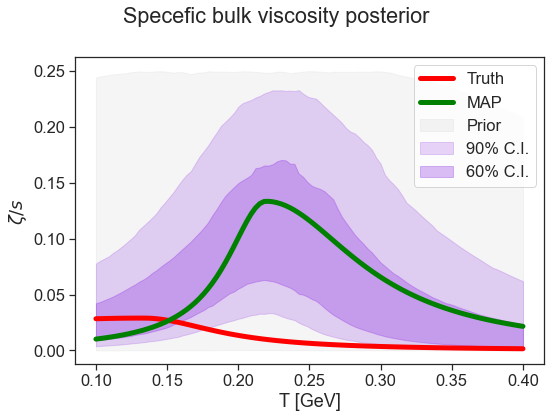

In [19]:
plot_bulk(post_df,'PCSK',xlimits, nsamples,prune,  MAP, closure_values)